In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split 
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
nltk.download('stopwords')

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from subprocess import check_output

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/sentiment analysis_train.csv",encoding='latin1')
test= pd.read_csv("/content/drive/MyDrive/sentiment analysis_test.csv",encoding='latin1')


In [ ]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
a=[]
for i in df['Sentiment']:
    if i=="positive":                              
        a.append(2)
    if i=="neutral":
        a.append(1)
    if i=="negative":
        a.append(0)

In [ ]:
a.count(1)

2626

In [ ]:
a.count(2)

1538

In [ ]:
a.count(0)

701

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


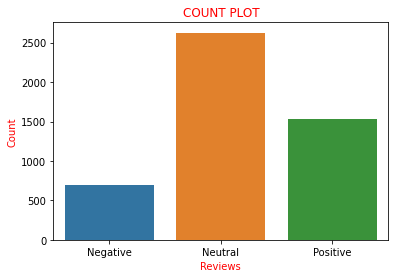

In [ ]:
sns.countplot(a)
plt.xlabel('Reviews', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1,2],['Negative','Neutral','Positive'])
plt.title('COUNT PLOT', color = 'r')
plt.show()

In [ ]:
df['Sentiment']=a
final_df = df[['Sentence','Sentiment']]
final_df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1
...,...,...
4860,3-star analyst Joe Wittine from Longbow Resear...,2
4861,Our standardised services have met with a posi...,2
4862,The Kyroskoski investment is to be completed i...,1
4863,The Group 's cash flow from operations will be...,2


In [ ]:
data_pos= final_df[df["Sentiment"]==2]
data_neg= final_df[df["Sentiment"]==0]
data_neu= final_df[df["Sentiment"]==1]



In [ ]:
datapos = data_pos.iloc[np.random.randint(1,1538,700), :]
dataneg = data_neg.iloc[np.random.randint(1, 701,700), :]
dataneu= data_neu.iloc[np.random.randint(1, 2626,700), :]

len(dataneg), len(datapos),len(dataneu)

(700, 700, 700)

In [ ]:
data = pd.concat([datapos,dataneu,dataneg])
len(data)

2100

In [ ]:
from bs4 import BeautifulSoup


In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
data['review'] = data['Sentence'].apply(strip_html)
data=data.drop('Sentence',axis=1)
data.head()


,Sentiment,review
1881,2,Lithuanian beer makers sold 256.88 million lit...
4312,2,"According to Schmardin , Nordea will most like..."
2171,2,$FB Dax says bye bye 2013 - finished a great y...
856,2,The company expects its net sales in 2008 to i...
2497,2,"Aspo Plc STOCK EXCHANGE RELEASE February 11 , ..."


In [ ]:
test['review'] = test['Sentence'].apply(strip_html)
test=test.drop('Sentence',axis=1)
test.head()

,review
0,Operating loss totaled EUR 25mn compared to a ...
1,Renewed AB InBev Bid for SABMiller Ups Stake i...
2,Rautaruukki Corporation Stock exchange release...
3,Etteplan targets to employ at least 20 people ...
4,Thanks to its extensive industry and operation...


In [ ]:
import nltk
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
data['review'] = data['review'].apply(punc_clean)
data.head(2)

,Sentiment,review
1881,2,Lithuanian beer makers sold 25688 million lite...
4312,2,According to Schmardin Nordea will most likel...


In [ ]:

test['review'] = test['review'].apply(punc_clean)
test.head(2)

,review
0,Operating loss totaled EUR 25mn compared to a ...
1,Renewed AB InBev Bid for SABMiller Ups Stake i...


In [ ]:
nltk.download('punkt')
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
data['review'] = data['review'].apply(remove_stopword)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
test['review'] = test['review'].apply(remove_stopword)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectr = TfidfVectorizer(ngram_range=(1,2),min_df=1)
vectr.fit(data['review'])
vect_X = vectr.transform(data['review'])
vect_X_test = vectr.transform(test['review'])

In [ ]:
from sklearn.svm import SVC
model = SVC()
clf=model.fit(vect_X,data['Sentiment'])
clf.score(vect_X,data['Sentiment'])*100

97.28571428571429

In [ ]:
y=clf.predict(vect_X_test)

In [ ]:
y

array([0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 2,
       1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2,
       2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       0, 0, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1,
       2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 1, 1,

In [ ]:
predictions=[]
for i in y:
  if i==0:
    predictions.append("negative")
  if i==1:
    predictions.append("neutral")
  if i==2:
    predictions.append("positive")


In [ ]:
predictions

['negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral'

In [ ]:
predictions_df= pd.DataFrame(predictions, columns =["Sentiment"])


In [ ]:
predictions_df.to_csv('ass4_sentimental_analysis.csv', index=True)